In [ ]:
#Синонимическая близость и алгебраические операции над векторами

In [ ]:
!pip install spacy
!pip install scipy==1.10.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
import scipy

In [ ]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bb6e7e93375af9e9ac438b5d163b226934be5ac83d2ecb13efdcab4c94f735b9
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2

In [ ]:
##Чтение датасета с текстом
import pandas as pd

df = pd.read_csv("ready_1.csv", encoding='UTF8')
#df = pd.read_csv("reviews.csv", encoding='UTF8', sep="\t")
df.head()

,Unnamed: 0,product_id,product_name,product_category,product_price,review_id,review_author,review_text,rating,text_lower,text_punct,text_stop,text_common,text_rare,text_nonum,text_token,text_ready
0,0,1261049,Десерт Fit Kit глазированный протеиновый Двойн...,Здоровое питание,213.0,3396923,Милана,Самое вкусное протеиновое печенье с белковым с...,5.0,самое вкусное протеиновое печенье с белковым с...,Самое вкусное протеиновое печенье с белковым с...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,Самое вкусное протеиновое печенье белковым суф...,"['самое', 'вкусное', 'протеиновое', 'печенье',...",самый вкусный протеиновый печение белков суфле...
1,1,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,1977331,любовь,"Веселая свечка, но нам пришла розовая, как на ...",5.0,"веселая свечка, но нам пришла розовая, как на ...",Веселая свечка но нам пришла розовая как на фо...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,Веселая свечка нам пришла розовая фото буду ис...,"['веселая', 'свечка', 'нам', 'пришла', 'розова...",весёлый свечка мы прийти розовый фото быть иск...
2,2,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,1451326,инна,Хорошая яркая свечка,5.0,хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,Хорошая яркая свечка,"['хорошая', 'яркая', 'свечка']",хороший яркий свечка
3,3,984168,Свеча для торта Paterra Детская Цифра 1,"Дом, дача, книги",97.9,449473,Marina,"Ребенок в восторге от свечек! Она красная, кст...",5.0,"ребенок в восторге от свечек! она красная, кст...",Ребенок в восторге от свечек Она красная кстат...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,Ребенок восторге свечек Она красная кстати роз...,"['ребенок', 'восторге', 'свечек', 'она', 'крас...",ребёнок восторг свечка красный кстати розовый ...
4,4,1271460,Сибас филе охлажденное,"Рыба, икра",1779.0,3444792,Роман,"Хорошая рыба, вкусная, свежая. Жаль, что возят...",5.0,"хорошая рыба, вкусная, свежая. жаль, что возят...",Хорошая рыба вкусная свежая Жаль что возят без...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,Хорошая рыба вкусная свежая Жаль возят охлажда...,"['хорошая', 'рыба', 'вкусная', 'свежая', 'жаль...",хороший рыба вкусный свежий жаль возить охлажд...


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('russian'))
# функция, удаляющая стопслова из текстов
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Удаление эмодзи
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#Удаление URL
# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text
#Можно выполнить при помощи NLTK. Заодно проведем лемматизацию
from pymorphy2 import MorphAnalyzer
from nltk import sent_tokenize, word_tokenize, regexp_tokenize

#def tokenize_lemmas(sent, pat=r"(?u)\b\w\w+\b", morph=MorphAnalyzer()):
#    return [morph.parse(tok)[0].normal_form
#            for tok in regexp_tokenize(sent, pat)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['text_ready']  = df['review_text'].str.lower()
df['text_ready'] = df['text_ready'].str.replace('\d+', '')
df['text_ready'] = df['text_ready'].str.replace('[^\w\s]','')
df["text_ready"] = df["text_ready"].apply(stopwords)
df['text_ready'] = df['text_ready'].apply(emoji)
df['text_ready'] = df['text_ready'].apply(remove_urls)
df['text_ready'] = df['text_ready'].apply(html)
#df["text_ready"] = df["text_ready"].map(lambda x: " ".join(tokenize_lemmas(x)))
df[['text_ready']].head()

<ipython-input-7-d17f1c4b3bbf>:27: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "lxml").text


,text_ready
0,самое вкусное протеиновое печенье белковым суф...
1,"веселая свечка, нам пришла розовая, фото) буду..."
2,хорошая яркая свечка
3,"ребенок восторге свечек! красная, кстати, розо..."
4,"хорошая рыба, вкусная, свежая. жаль, возят охл..."


In [ ]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [ ]:
w2v_model = Word2Vec(
    min_count=5,
    window=5,
    vector_size=1000,
    negative=5,
    workers=24,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)
#vector_size — размер векторного представления слова (word embedding).
#negative — сколько неконтекстных слов учитывать в обучении, используя negative sampling.
#alpha — начальный learning_rate, используемый в алгоритме обратного распространения ошибки (Backpropogation).
#min_alpha — минимальное значение learning_rate, на которое может опуститься в процессе обучения.
#sg — если 1, то используется реализация Skip-gram; если 0, то CBOW.

In [ ]:
#Получаем лист слов
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

class MySentences(object):
    def __init__(self, docs):
        self.corpus = docs
    def __iter__(self):
        for doc in self.corpus:
            doc_sentences = sent_tokenize(doc)
            for sent in doc_sentences:
                yield simple_preprocess(sent) # yields a tokenized

In [ ]:
sentences = MySentences(df['text_ready'].tolist())

In [ ]:
#Получаем словарь
import nltk
nltk.download('punkt_tab')
w2v_model.build_vocab(sentences)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Обучение
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=5, report_delay=1)

(893825, 1839570)

In [ ]:
#для сохранения оперативной памяти можно написать следующее
w2v_model.init_sims(replace=True)

<ipython-input-15-ccdb4c4f0af4>:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)


In [ ]:
w2v_model.wv.most_similar(positive=["плохой"], topn=30)

[('кучу', 0.9997801780700684),
 ('креме', 0.9997799396514893),
 ('дорогими', 0.9997789263725281),
 ('начал', 0.9997771978378296),
 ('натурального', 0.9997762441635132),
 ('входит', 0.9997751116752625),
 ('бокам', 0.9997750520706177),
 ('защиту', 0.9997748136520386),
 ('обратной', 0.9997745156288147),
 ('плита', 0.9997744560241699),
 ('порцией', 0.9997743368148804),
 ('средствами', 0.9997740983963013),
 ('языке', 0.9997727870941162),
 ('закрыть', 0.9997724294662476),
 ('поверхностей', 0.999771773815155),
 ('движениями', 0.9997717142105103),
 ('множество', 0.9997712969779968),
 ('стянутости', 0.9997712969779968),
 ('тряпкой', 0.999771237373352),
 ('пакета', 0.999770998954773),
 ('поменять', 0.9997706413269043),
 ('мешает', 0.9997706413269043),
 ('затем', 0.9997700452804565),
 ('духовку', 0.9997698068618774),
 ('нужной', 0.9997695088386536),
 ('соверешнно', 0.9997694492340088),
 ('оттенка', 0.9997690916061401),
 ('желание', 0.9997689723968506),
 ('бактерий', 0.9997686147689819),
 ('удалос

In [ ]:
w2v_model.wv.most_similar(positive=["товар", "продукт", "покупка"], topn=50)

[('волокна', 0.9998338222503662),
 ('шампуни', 0.9998321533203125),
 ('окрашивания', 0.9998317360877991),
 ('креме', 0.9998309016227722),
 ('упаковкой', 0.9998306035995483),
 ('подумала', 0.999830424785614),
 ('знает', 0.9998292922973633),
 ('окнах', 0.999829113483429),
 ('роза', 0.9998288750648499),
 ('усилий', 0.999828577041626),
 ('множество', 0.9998281002044678),
 ('беда', 0.9998281002044678),
 ('ожидать', 0.999828040599823),
 ('семена', 0.9998273849487305),
 ('имеются', 0.9998272061347961),
 ('отдохнуть', 0.9998270273208618),
 ('кучу', 0.9998270273208618),
 ('языке', 0.9998267292976379),
 ('защиты', 0.9998264312744141),
 ('обуви', 0.9998262524604797),
 ('входит', 0.999826192855835),
 ('зависимости', 0.999826192855835),
 ('дорогими', 0.999826192855835),
 ('помощь', 0.9998259544372559),
 ('полезных', 0.9998255968093872),
 ('пластиковой', 0.9998254179954529),
 ('отзывах', 0.9998252987861633),
 ('спрея', 0.9998252391815186),
 ('силы', 0.999825119972229),
 ('тд', 0.9998245239257812),
 

In [ ]:
#Векторы можно складывать и вычитать. Например, рассмотрим такой вариант: “товар” + “продавец” — “ужасный”:
w2v_model.wv.most_similar(positive=["товар", "время", "вернуть"], negative=["плохой"], topn=100)

[('лице', 0.9997413158416748),
 ('эффектом', 0.9997397065162659),
 ('использование', 0.9997384548187256),
 ('помощь', 0.9997366070747375),
 ('пищевой', 0.999735951423645),
 ('окнах', 0.9997347593307495),
 ('секунд', 0.9997333288192749),
 ('окрашивания', 0.9997330904006958),
 ('будете', 0.9997317790985107),
 ('обратно', 0.9997314810752869),
 ('спокойнее', 0.99973064661026),
 ('удивило', 0.9997297525405884),
 ('насчёт', 0.9997295141220093),
 ('силы', 0.9997286796569824),
 ('множество', 0.9997285604476929),
 ('отдохнуть', 0.9997283220291138),
 ('кишечнику', 0.9997274279594421),
 ('семена', 0.999727189540863),
 ('резинка', 0.9997267127037048),
 ('химией', 0.999726414680481),
 ('грязи', 0.999725878238678),
 ('усилий', 0.9997257590293884),
 ('полчаса', 0.9997254610061646),
 ('работают', 0.999725341796875),
 ('чистым', 0.9997252225875854),
 ('морозилку', 0.9997251033782959),
 ('внешней', 0.9997249841690063),
 ('знает', 0.9997248649597168),
 ('эко', 0.9997246265411377),
 ('пластиковой', 0.9997

In [ ]:
#определить наиболее близкое слово из списка к данному слово
w2v_model.wv.most_similar_to_given("плохой", ["товар", "продавец", "человек", "сервис"])

'человек'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def tsne_scatterplot(model, word, list_names):
    """Plot in seaborn the results from the t-SNE dimensionality reduction
    algorithm of the vectors of a query word,
    its list of most similar words, and a list of words."""
    vectors_words = [model.wv.word_vec(word)]
    word_labels = [word]
    color_list = ['red']

    close_words = model.wv.most_similar(word)
    for wrd_score in close_words:
        wrd_vector = model.wv.word_vec(wrd_score[0])
        vectors_words.append(wrd_vector)
        word_labels.append(wrd_score[0])
        color_list.append('blue')

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.word_vec(wrd)
        vectors_words.append(wrd_vector)
        word_labels.append(wrd)
        color_list.append('green')

    # t-SNE reduction
    Y = (TSNE(n_components=2, random_state=0, perplexity=10, init="pca").fit_transform(np.array(vectors_words)))
    # Sets everything up to plot
    df = pd.DataFrame({"x": [x for x in Y[:, 0]],
                    "y": [y for y in Y[:, 1]],
                    "words": word_labels,
                    "color": color_list})
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    # Basic plot
    p1 = sns.regplot(data=df,
                    x="x",
                    y="y",
                    fit_reg=False,
                    marker="o",
                    scatter_kws={"s": 40,
                                "facecolors": df["color"]}
    )
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
        p1.text(df["x"][line],
                df["y"][line],
                " " + df["words"][line].title(),
                horizontalalignment="left",
                verticalalignment="bottom", size="medium",
                color=df["color"][line],
                weight="normal"
        ).set_size(15)

    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    plt.title('t-SNE visualization for {}'.format(word.title()))

<ipython-input-20-4b83adc89cbd>:9: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vectors_words = [model.wv.word_vec(word)]
<ipython-input-20-4b83adc89cbd>:15: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  wrd_vector = model.wv.word_vec(wrd_score[0])
<ipython-input-20-4b83adc89cbd>:22: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  wrd_vector = model.wv.word_vec(wrd)


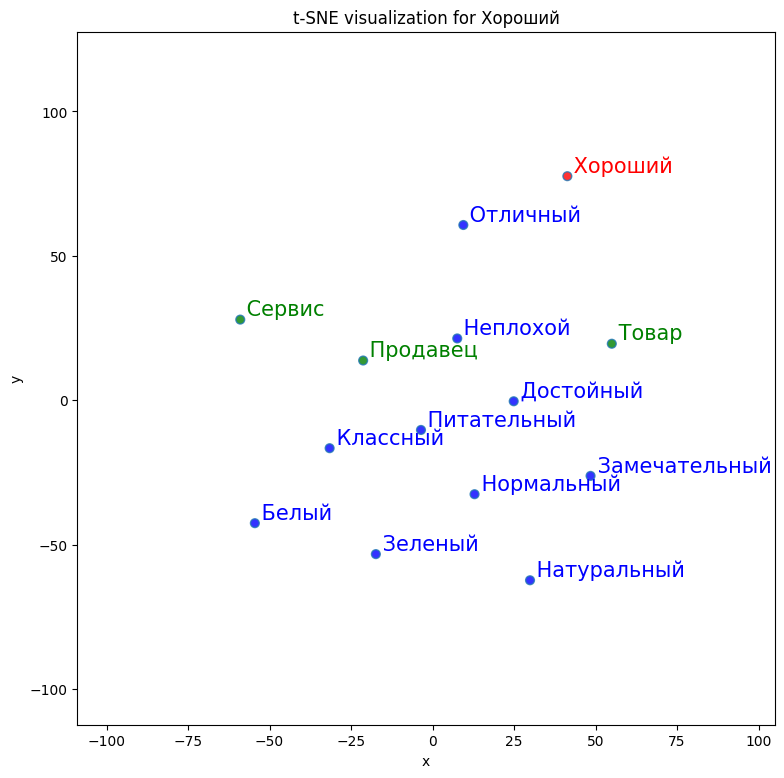

In [ ]:
tsne_scatterplot(w2v_model, "хороший", ["товар", "продавец", "сервис"])